In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore


In [2]:
data=pd.read_csv("E:\Data Analysis\DATA FILES\winequality-red.csv")

In [3]:
print(data.head())
print(data.tail())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


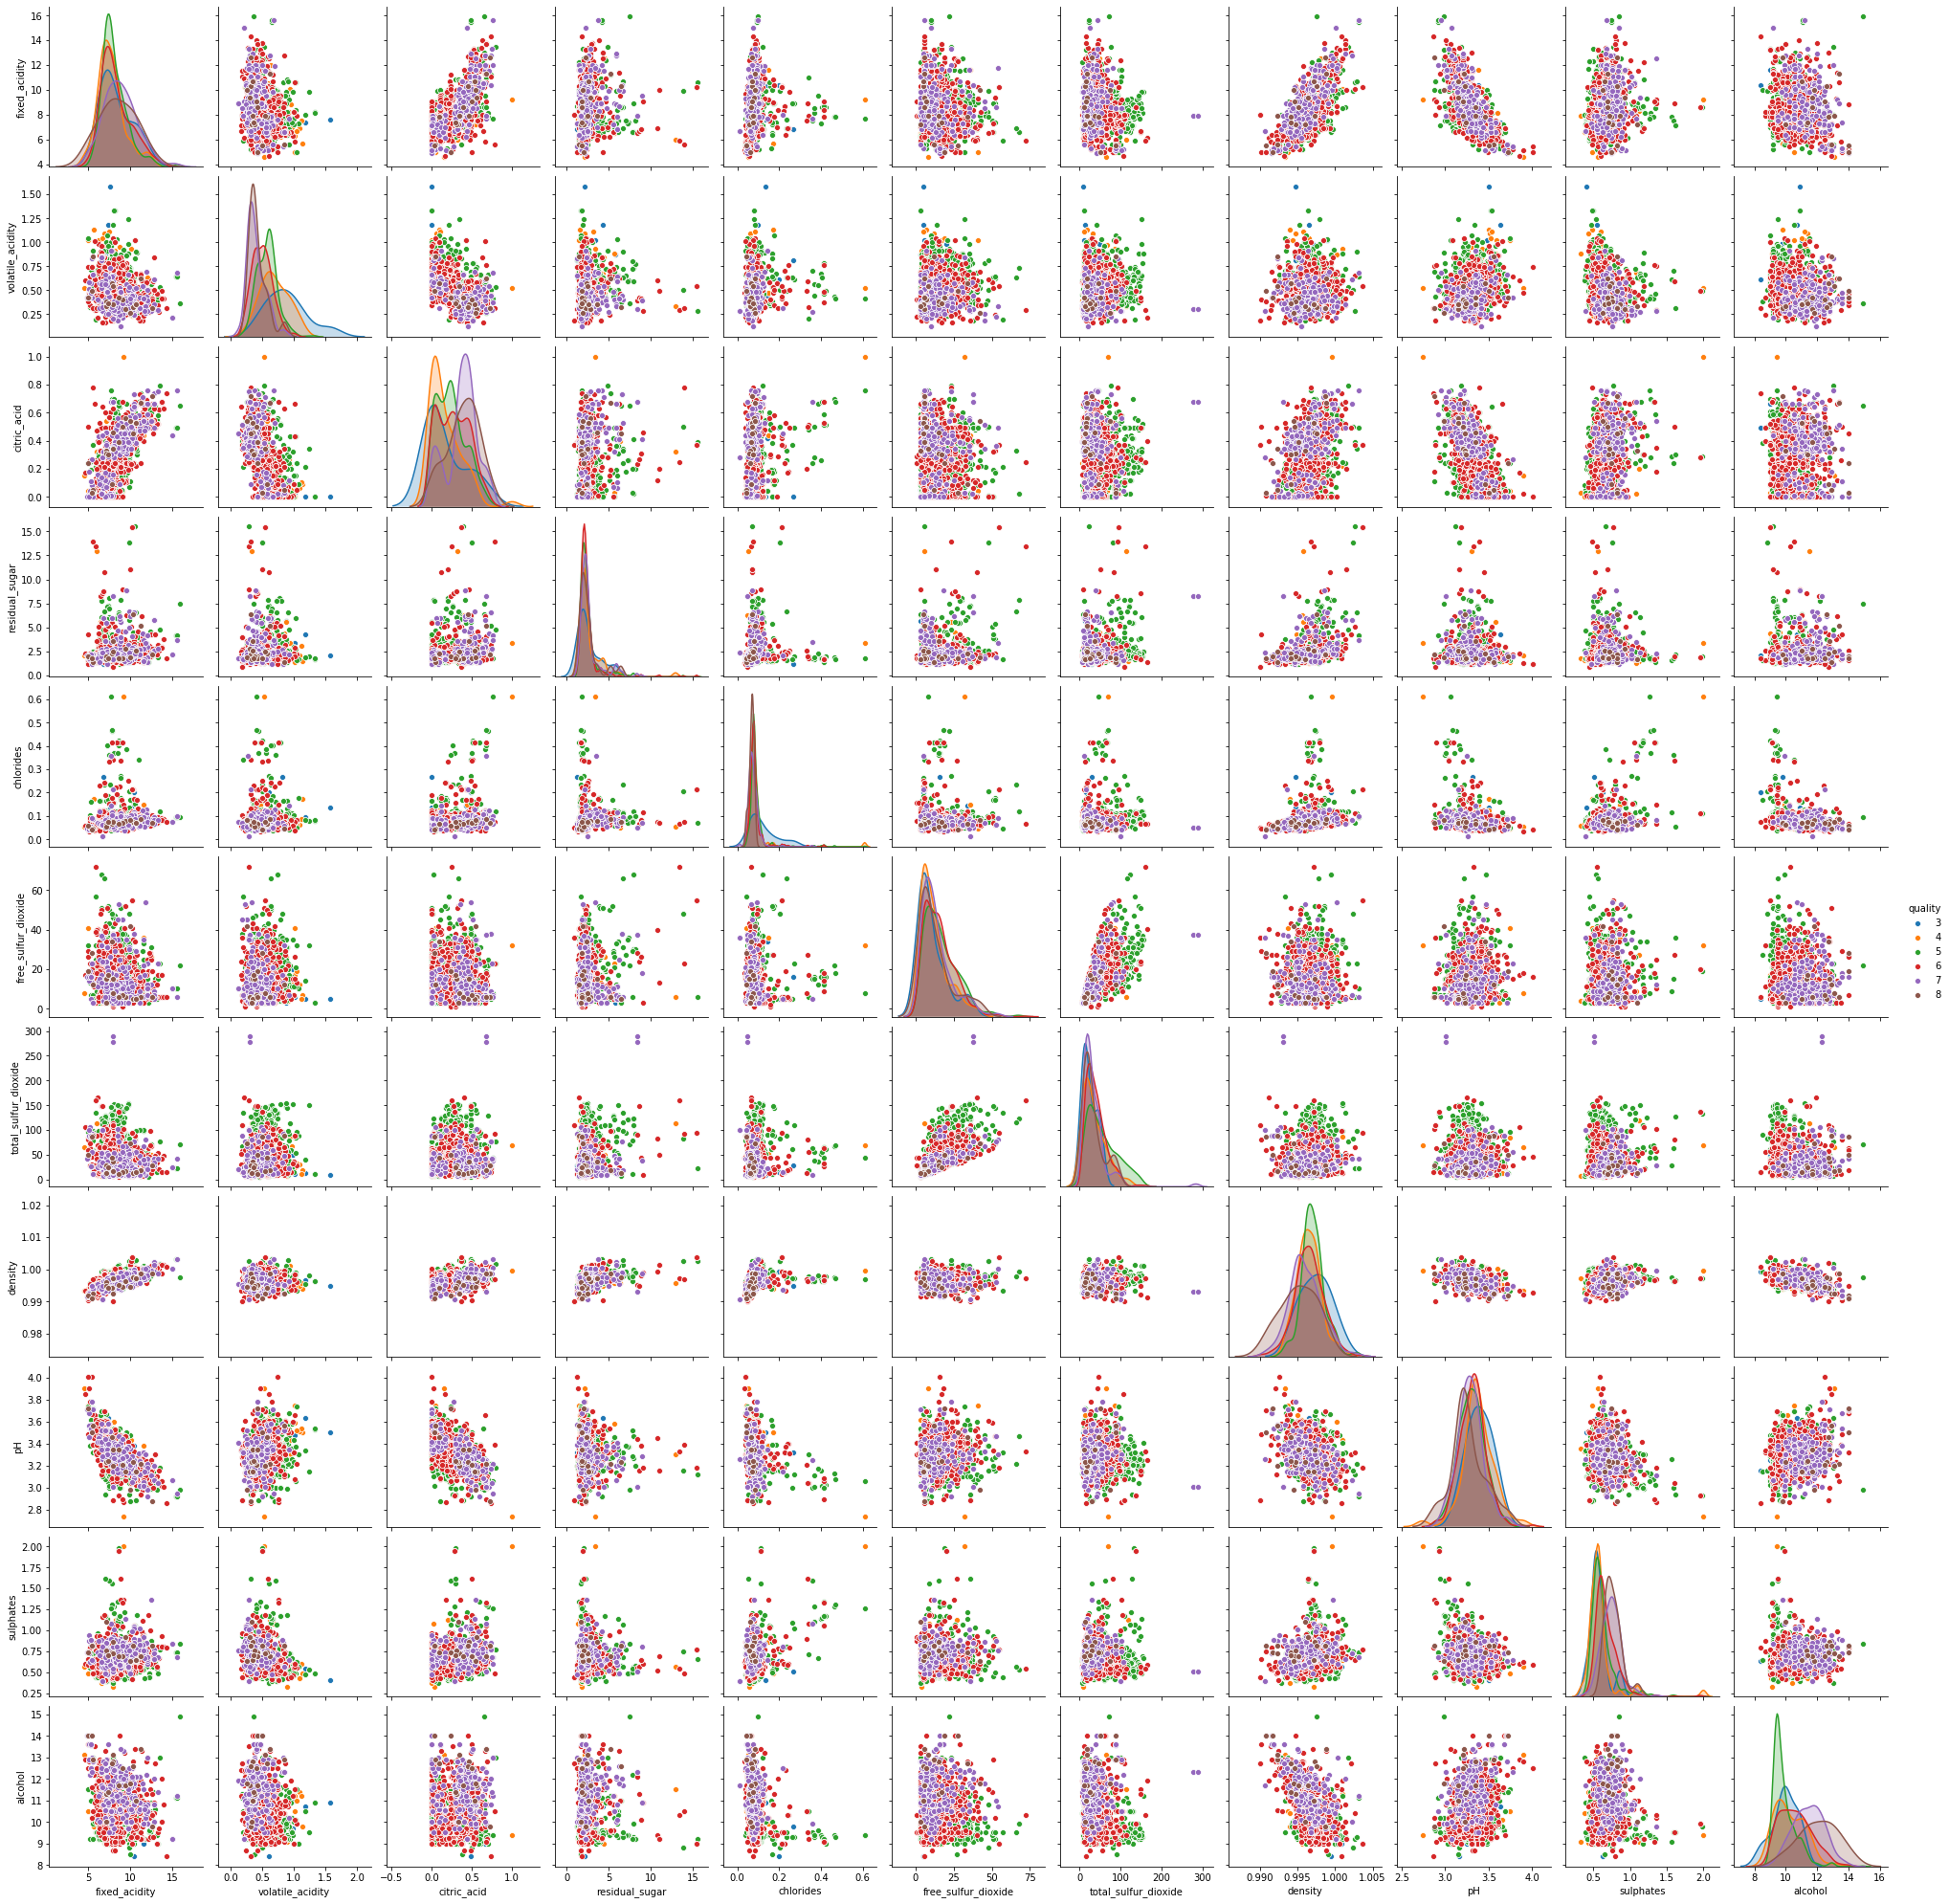

In [6]:
sns.pairplot(data,diag_kind="kde",hue="quality")
plt.show()

In [7]:
df=data.drop("quality",axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


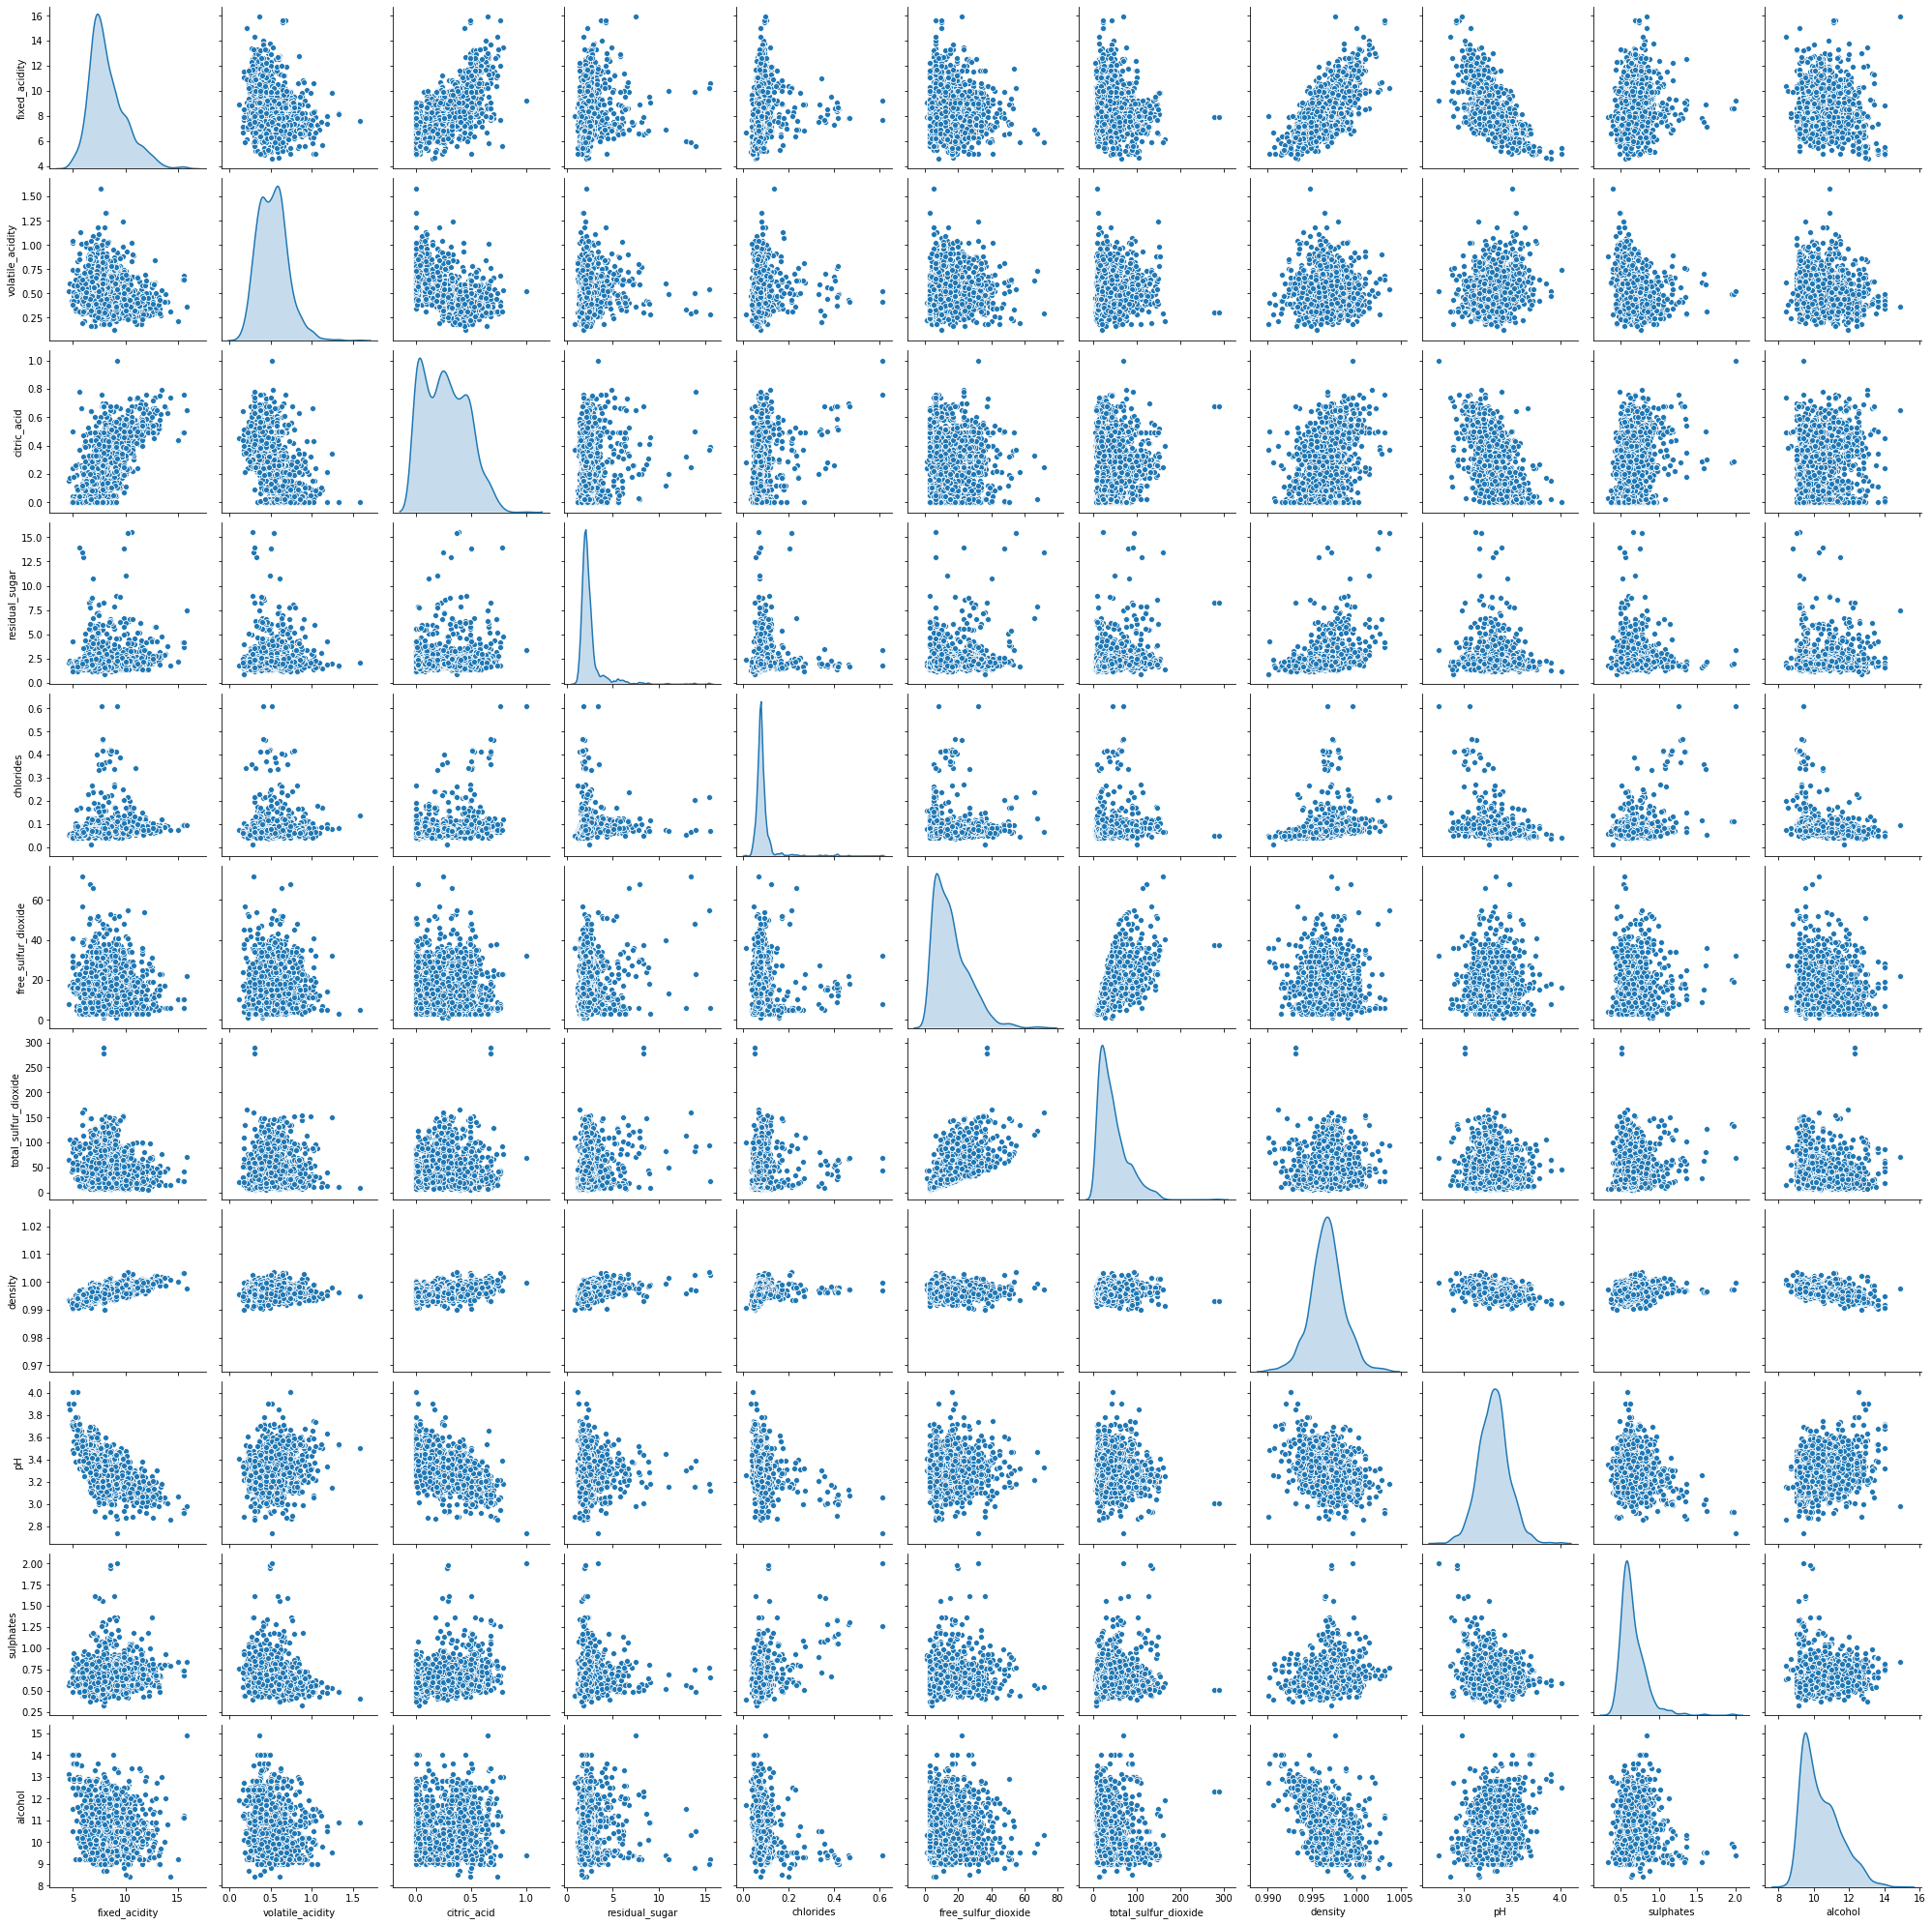

In [8]:
sns.pairplot(df,diag_kind="kde")
plt.show()

In [9]:
df_scaled=df.apply(zscore)
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [10]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=15,random_state=2)
    clusters.fit(df_scaled)

In [11]:
labels=clusters.labels_
print(labels)
centroids=clusters.cluster_centers_
print(centroids)
cluster_errors.append(clusters.inertia_)

[ 5 10  1 ...  3  3  2]
[[-3.24250112e-01  1.85650453e-01  2.24715950e-01  2.96161090e+00
   1.72978125e-01  1.64775077e+00  1.98636486e+00  7.61632349e-01
  -7.03004127e-02  2.17470016e-01 -2.24129260e-01]
 [ 6.00288539e-02  3.24906051e-01 -3.47690272e-01 -2.79235879e-01
   5.95059596e-02 -5.82006663e-01 -3.54836077e-01  1.99143575e-01
  -4.69878745e-01 -4.09877543e-01 -6.80059444e-01]
 [-3.90066456e-02 -1.02668163e+00  6.43737607e-01 -1.64683632e-01
  -3.16117623e-01 -3.52213986e-01 -5.71487086e-01 -9.80583323e-01
  -1.28134116e-01  1.96884059e-01  1.28110733e+00]
 [-7.45088423e-01  1.75345019e-01 -8.41869807e-01 -2.64960896e-01
  -3.02627896e-01  1.59933738e+00  4.39500794e-01 -7.78776917e-01
   5.00223828e-01 -1.35147726e-01  2.07673129e-01]
 [ 2.21243317e+00 -3.86204233e-01  1.48246998e+00  2.91442651e-01
  -1.89747086e-02 -3.83887348e-01 -3.00368479e-01  1.62959723e+00
  -1.30253724e+00  2.18437444e-01 -7.99717896e-04]
 [-7.21946376e-01  2.37541747e-01 -8.93228437e-01 -2.85536575

In [21]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,17589.000000
1,2,14330.142460
2,3,12629.950272
3,4,11295.828163
4,5,10155.509585
5,6,9364.843259
6,7,8644.639865
7,8,8305.525744
8,9,7966.662835
9,10,7668.879157


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

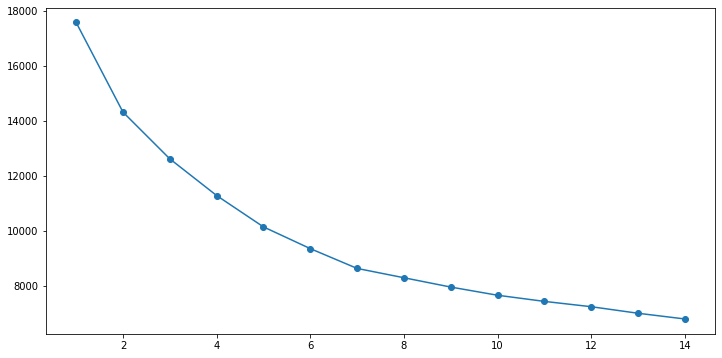

In [22]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [25]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.324250,0.185650,0.224716,2.961611,0.172978,1.647751,1.986365,0.761632,-0.070300,0.217470,-0.224129
1,0.060029,0.324906,-0.347690,-0.279236,0.059506,-0.582007,-0.354836,0.199144,-0.469879,-0.409878,-0.680059
2,-0.039007,-1.026682,0.643738,-0.164684,-0.316118,-0.352214,-0.571487,-0.980583,-0.128134,0.196884,1.281107
3,-0.745088,0.175345,-0.841870,-0.264961,-0.302628,1.599337,0.439501,-0.778777,0.500224,-0.135148,0.207673
4,2.212433,-0.386204,1.482470,0.291443,-0.018975,-0.383887,-0.300368,1.629597,-1.302537,0.218437,-0.000800
5,-0.721946,0.237542,-0.893228,-0.285537,-0.201029,-0.275699,-0.293401,-0.089534,0.812715,-0.259967,-0.487580
6,0.070110,-0.023904,1.390011,-0.391139,6.635415,-0.079685,0.187234,0.176665,-1.597336,3.141076,-0.940690
7,0.078089,-0.087139,0.263154,-0.106363,0.099895,0.415736,1.497776,0.414582,-1.198680,4.194296,-0.496125
8,0.140774,-0.580705,0.502317,-0.174762,-0.075435,1.166721,0.571548,0.410508,0.286060,0.234109,-0.231187
9,-0.535773,1.730693,-1.032433,0.113792,0.070814,-0.627762,-0.685184,-0.233027,0.611976,-0.669154,0.005300
